# Mini project-------Analysis of student preference

### Data

I use part of the [student preference](http://archive.ics.uci.edu/ml/datasets/Student+Performance) data from UCI ML repo.

#### Data Set Information:
This data approach student achievement in secondary education of two Portuguese schools. The data attributes include student grades, demographic, social and school related features) and it was collected by using school reports and questionnaires. Two datasets are provided regarding the performance in two distinct subjects: Mathematics (mat) and Portuguese language (por). In [Cortez and Silva, 2008], the two datasets were modeled under binary/five-level classification and regression tasks. Important note: the target attribute G3 has a strong correlation with attributes G2 and G1. This occurs because G3 is the final year grade (issued at the 3rd period), while G1 and G2 correspond to the 1st and 2nd period grades. It is more difficult to predict G3 without G2 and G1, but such prediction is much more useful (see paper source for more details).


#### Attribute Information:
Attributes for both student-mat.csv (Math course) and student-por.csv (Portuguese language course) datasets: 
1. school - student's school (binary: 'GP' - Gabriel Pereira or 'MS' - Mousinho da Silveira) 
2. sex - student's sex (binary: 'F' - female or 'M' - male) 
3. age - student's age (numeric: from 15 to 22) 
4. address - student's home address type (binary: 'U' - urban or 'R' - rural) 
5. famsize - family size (binary: 'LE3' - less or equal to 3 or 'GT3' - greater than 3) 
6. Pstatus - parent's cohabitation status (binary: 'T' - living together or 'A' - apart) 
7. Medu - mother's education (numeric: 0 - none, 1 - primary education (4th grade), 2 â€“ 5th to 9th grade, 3 â€“ secondary education or 4 â€“ higher education) 
8. Fedu - father's education (numeric: 0 - none, 1 - primary education (4th grade), 2 â€“ 5th to 9th grade, 3 â€“ secondary education or 4 â€“ higher education) 
9. Mjob - mother's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other') 
10. Fjob - father's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other') 
11. reason - reason to choose this school (nominal: close to 'home', school 'reputation', 'course' preference or 'other') 
12. guardian - student's guardian (nominal: 'mother', 'father' or 'other') 
13. traveltime - home to school travel time (numeric: 1 - <15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4 - >1 hour) 
14. studytime - weekly study time (numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours) 
15. failures - number of past class failures (numeric: n if 1<=n<3, else 4) 
16. schoolsup - extra educational support (binary: yes or no) 
17. famsup - family educational support (binary: yes or no) 
18. paid - extra paid classes within the course subject (Math or Portuguese) (binary: yes or no) 
19. activities - extra-curricular activities (binary: yes or no) 
20. nursery - attended nursery school (binary: yes or no) 
21. higher - wants to take higher education (binary: yes or no) 
22. internet - Internet access at home (binary: yes or no) 
23. romantic - with a romantic relationship (binary: yes or no) 
24. famrel - quality of family relationships (numeric: from 1 - very bad to 5 - excellent) 
25. freetime - free time after school (numeric: from 1 - very low to 5 - very high) 
26. goout - going out with friends (numeric: from 1 - very low to 5 - very high) 
27. Dalc - workday alcohol consumption (numeric: from 1 - very low to 5 - very high) 
28. Walc - weekend alcohol consumption (numeric: from 1 - very low to 5 - very high) 
29. health - current health status (numeric: from 1 - very bad to 5 - very good) 
30. absences - number of school absences (numeric: from 0 to 93) 

these grades are related with the course subject, Math or Portuguese: 
31. G1 - first period grade (numeric: from 0 to 20) 
31. G2 - second period grade (numeric: from 0 to 20) 
32. G3 - final grade (numeric: from 0 to 20, output target)


citation: P. Cortez and A. Silva. Using Data Mining to Predict Secondary School Student Performance. In A. Brito and J. Teixeira Eds., Proceedings of 5th FUture BUsiness TEChnology Conference (FUBUTEC 2008) pp. 5-12, Porto, Portugal, April, 2008, EUROSIS, ISBN 978-9077381-39-7. 

In [1]:
import os
import pickle
import numpy as np
import pandas as pd
import numpy.linalg as npla
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import accuracy_score, log_loss
from sklearn.linear_model import LogisticRegression
from sklearn import linear_model
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, cross_val_score
from sklearn.linear_model import ElasticNet
from sklearn.datasets import make_regression
from sklearn.svm import SVR, LinearSVR
from collections import deque
from sklearn.datasets import load_boston
%matplotlib inline

## Input data

In [2]:
#input raw data
#Due to the whole dataset is a zip file and have several csv file, i can't use URL to download it.
#So i directly download it by hand and put it to my data folder.
student=pd.read_csv('../data/student-mat.csv',sep=";")

In [3]:
student.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [4]:
# Find percentage of missing data in each feature
for i in range(0,33):
    if student.iloc[:,i].dtype == "O":
        print(student.columns[i])
        print(sum(student.iloc[:,i]=="?")/len(student.iloc[:,i]))
#all out put are 0, so there are no missing value

school
0.0
sex
0.0
address
0.0
famsize
0.0
Pstatus
0.0
Mjob
0.0
Fjob
0.0
reason
0.0
guardian
0.0
schoolsup
0.0
famsup
0.0
paid
0.0
activities
0.0
nursery
0.0
higher
0.0
internet
0.0
romantic
0.0


In [5]:
student.shape

(395, 33)

In [6]:
# In this case, we want use some features to predict students final grade(G3), so i use G3 as response variable.
y=student["G3"]
X=student.drop(["G3","school"],axis=1)

## Data wrangled

In [7]:
#  recode all factors as numbers
X["sex"]=X["sex"].map({'F':0,'M':1})
X["address"]=X["address"].map({'U':0,'R':1})
X["famsize"]=X["famsize"].map({'LE3':0,'GT3':1})
X["Pstatus"]=X["Pstatus"].map({'T':0,'A':1})
X["Mjob"]=X["Mjob"].map({'teacher':0,'health':1,'services':2,'at_home':3,'other':4})
X["Fjob"]=X["Fjob"].map({'teacher':0,'health':1,'services':2,'at_home':3,'other':4})
X["reason"]=X["reason"].map({'home':0,'reputation':1,'course':2,'other':3})
X["guardian"]=X["guardian"].map({'mother':0,'father':1,'other':2})
X["schoolsup"]=X["schoolsup"].map({'yes':0,'no':1})
X["famsup"]=X["famsup"].map({'yes':0,'no':1})
X["paid"]=X["paid"].map({'yes':0,'no':1})
X["activities"]=X["activities"].map({'yes':0,'no':1})
X["nursery"]=X["nursery"].map({'yes':0,'no':1})
X["higher"]=X["higher"].map({'yes':0,'no':1})
X["romantic"]=X["romantic"].map({'yes':0,'no':1})
X["internet"]=X["internet"].map({'yes':0,'no':1})

X.head()

,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,...,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2
0,0,18,0,1,1,4,4,3,0,2,...,1,4,3,4,1,1,3,6,5,6
1,0,17,0,1,0,1,1,3,4,2,...,1,5,3,3,1,1,3,4,5,5
2,0,15,0,0,0,1,1,3,4,3,...,1,4,3,2,2,3,3,10,7,8
3,0,15,0,1,0,4,2,1,2,0,...,0,3,2,2,1,1,5,2,15,14
4,0,16,0,1,0,3,3,4,4,0,...,1,4,3,2,1,2,5,4,6,10


In [8]:
#Set training data and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12345)

In [9]:
X_train.shape

(316, 31)

## EDA

In [10]:
X.describe()

,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,...,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,...,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,0.473418,16.696203,0.222785,0.711392,0.103797,2.749367,2.521519,2.483544,2.956962,1.273418,...,0.665823,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924
std,0.499926,1.276043,0.416643,0.453690,0.305384,1.094735,1.088201,1.421948,1.294530,0.967060,...,0.472300,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505
min,0.000000,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000
25%,0.000000,16.000000,0.000000,0.000000,0.000000,2.000000,2.000000,2.000000,2.000000,0.000000,...,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000
50%,0.000000,17.000000,0.000000,1.000000,0.000000,3.000000,2.000000,3.000000,4.000000,1.000000,...,1.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000
75%,1.000000,18.000000,0.000000,1.000000,0.000000,4.000000,3.000000,4.000000,4.000000,2.000000,...,1.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000
max,1.000000,22.000000,1.000000,1.000000,1.000000,4.000000,4.000000,4.000000,4.000000,3.000000,...,1.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000


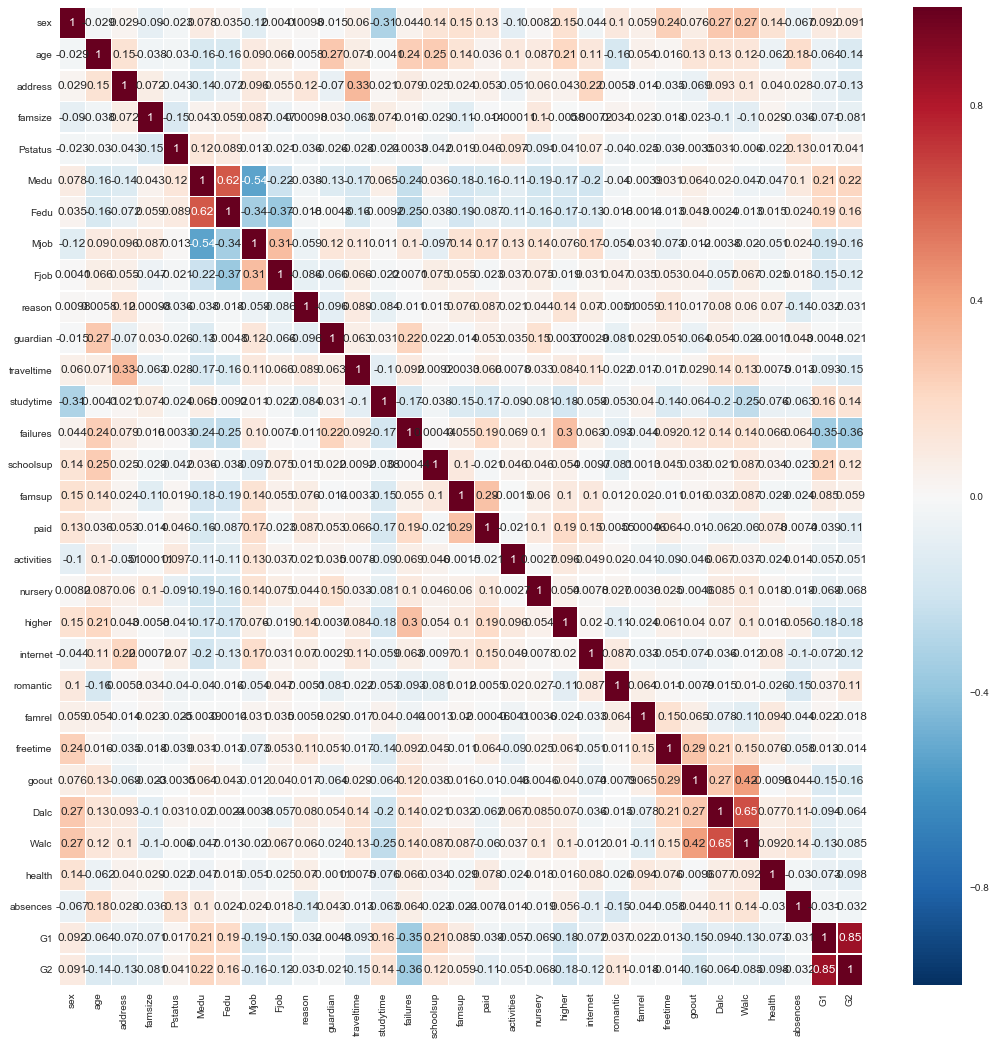

In [11]:
import seaborn as sns
f,ax = plt.subplots(figsize=(18,18))
sns.heatmap(X.corr(), annot=True, linewidths=.5,ax=ax)

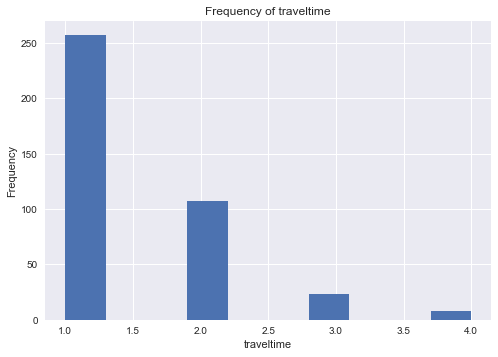

In [12]:
# Plot travel time histogram

plt.hist(X["traveltime"])
plt.title("Frequency of traveltime")
plt.xlabel("traveltime")
plt.ylabel("Frequency")
plt.savefig("../results/traveltime.png")
plt.show()


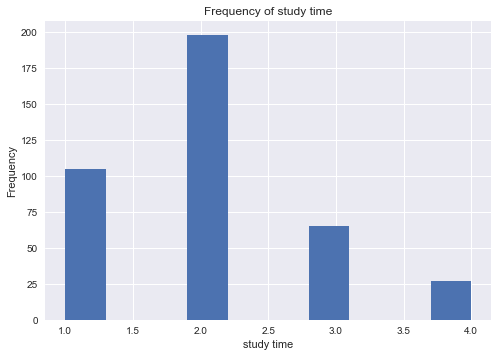

In [13]:
# Plot study time histogram

plt.hist(X["studytime"])
plt.title("Frequency of study time")
plt.xlabel("study time")
plt.ylabel("Frequency")
plt.savefig("../results/studytime.png")
plt.show()

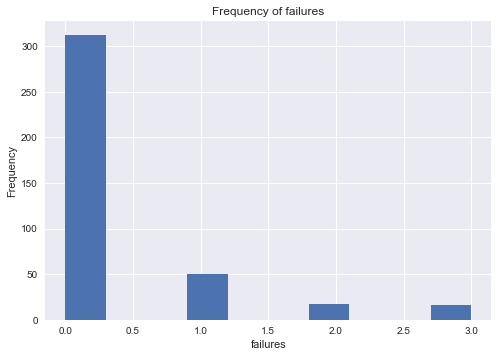

In [14]:
# Plot failures histogram

plt.hist(X["failures"])
plt.title("Frequency of failures")
plt.xlabel("failures")
plt.ylabel("Frequency")
plt.savefig("../results/failures.png")
plt.show()

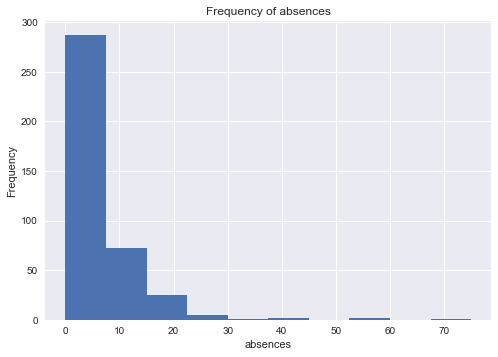

In [15]:
# Plot absences histogram

plt.hist(X["absences"])
plt.title("Frequency of absences")
plt.xlabel("absences")
plt.ylabel("Frequency")
plt.savefig("../results/absences.png")
plt.show()

## feature selection

In [16]:
#drop features with largr relation ship
#We can see from plot,Dalc(workday alcohol consumption) have large correlation with Walc(weekly alcohol consumption)
#So I delete the Wacl from X.
#G1 and G2 are highly correlated, so i delete G1.
#Mather job, father job, and father education are highly correlated, so I delete Fedu and Mjob.


drop_feature=['Fedu','Mjob','Walc','G1']

X_new=X.drop(drop_feature,axis=1)
X_new.shape


(395, 27)

In [17]:
X_new.describe()

,sex,age,address,famsize,Pstatus,Medu,Fjob,reason,guardian,traveltime,...,higher,internet,romantic,famrel,freetime,goout,Dalc,health,absences,G2
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,...,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,0.473418,16.696203,0.222785,0.711392,0.103797,2.749367,2.956962,1.273418,0.389873,1.448101,...,0.050633,0.167089,0.665823,3.944304,3.235443,3.108861,1.481013,3.554430,5.708861,10.713924
std,0.499926,1.276043,0.416643,0.453690,0.305384,1.094735,1.294530,0.967060,0.633176,0.697505,...,0.219525,0.373528,0.472300,0.896659,0.998862,1.113278,0.890741,1.390303,8.003096,3.761505
min,0.000000,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,0.000000,16.000000,0.000000,0.000000,0.000000,2.000000,2.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,4.000000,3.000000,2.000000,1.000000,3.000000,0.000000,9.000000
50%,0.000000,17.000000,0.000000,1.000000,0.000000,3.000000,4.000000,1.000000,0.000000,1.000000,...,0.000000,0.000000,1.000000,4.000000,3.000000,3.000000,1.000000,4.000000,4.000000,11.000000
75%,1.000000,18.000000,0.000000,1.000000,0.000000,4.000000,4.000000,2.000000,1.000000,2.000000,...,0.000000,0.000000,1.000000,5.000000,4.000000,4.000000,2.000000,5.000000,8.000000,13.000000
max,1.000000,22.000000,1.000000,1.000000,1.000000,4.000000,4.000000,3.000000,2.000000,4.000000,...,1.000000,1.000000,1.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000


In [24]:
#Set training data and test data
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.2, random_state=12345)

## Model selection

In [31]:
# Model selection
method = {
    'linearregression'  : LinearRegression(),
    'ridge' : Ridge(),
    'log regression': LogisticRegression(),
    'ElasticNet'   : ElasticNet(),
    'SVR'  : SVR()
}

#MSE in  regression
mean_squared_err = lambda y, yhat: np.mean((y-yhat)**2)

for c in method:
    clf = method[c]
    clf.fit(X_train, y_train)
    print(c)
    print("Training error: ", mean_squared_err(y_train,clf.predict(X_train)))
    print("Validation error: ",mean_squared_err(y_test,clf.predict(X_test)))
    print("\n")

linearregression
Training error:  3.338572721713034
Validation error:  3.7990290283540413


ridge
Training error:  3.3386605459173735
Validation error:  3.7852124560396296


log regression
Training error:  2.9588607594936707
Validation error:  9.468354430379748


ElasticNet
Training error:  3.857997453215386
Validation error:  3.6716456578719723


SVR
Training error:  4.744763231812732
Validation error:  6.20641164723413




The ridge classifier get small training error and validation error. The ElasticNet classifier can get the lowest validation error but the training error is large. So i choose Ridge method.

Min L2 validation error: 3.467283
alpha that Minimun L2 validation error: 125.892541


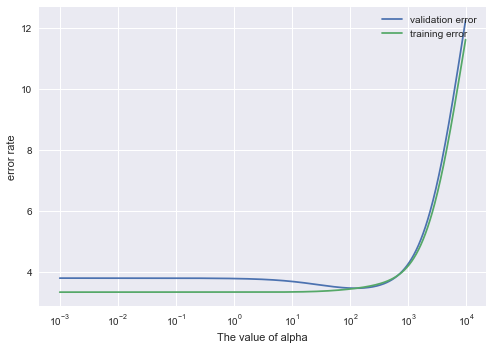

In [65]:
#select the parameter
alpha = 10**np.arange(-3,4,0.01)

#L2

train_error=[]
validation_error=[]
for a in alpha:
    l2 = Ridge(alpha=a)
    l2.fit(X_train,y_train)
    train_error.append( mean_squared_err(y_train, l2.predict(X_train)))
    validation_error.append(mean_squared_err(y_test, l2.predict(X_test)))

print("Min L2 validation error: %f" % min(validation_error))
print("alpha that Minimun L2 validation error: %f" % alpha[validation_error.index(min(validation_error))])

plt.plot(alpha, validation_error,label='validation error')
plt.plot(alpha, train_error,label='training error')
plt.ylabel("error rate")
plt.xlabel("The value of alpha")
plt.xscale("log")
plt.legend(loc='upper right')
plt.show()




## Feature selection again (forward selection)

In [62]:
# ForwardSelection
#Reference: lab1 solution in DSCI573
def fit_and_report(model, X, y, Xv, yv):
    model.fit(X,y)
    mean_squared_err = lambda y, yhat: np.mean((y-yhat)**2)
    errors = [mean_squared_err(y, model.predict(X)), mean_squared_err(yv, model.predict(Xv))]
    return errors



class ForwardSelection:
    def __init__(self, model, min_features=None, max_features=None,
                 scoring=None, cv=None):
        self.max_features = max_features
        if min_features is None:
            self.min_features = 1
        else:
            self.min_features = min_features

        self.model = model
        self.scoring = scoring
        self.cv = cv
        return

    def fit(self, X, y):
        if (self.max_features is None) or (self.max_features > X.shape[1]):
            self.max_features = X.shape[1]

        self.ftr_ = []
        idx = np.setdiff1d(range(X.shape[1]), self.ftr_)

        best_round_score = deque()
        best_round_score.append(np.inf)

        X_train, X_val, y_train, y_val = train_test_split(X, y,test_size=0.2,random_state=1245)

        for j in range(self.max_features):
            round_scores = np.zeros(idx.size)
            for i, ii in enumerate(idx):
                X_train_s = X_train.iloc[:, self.ftr_ + [ii]]
                X_val_s = X_val.iloc[:, self.ftr_ + [ii]]
                round_scores[i] = fit_and_report(self.model, X_train_s, y_train,
                                                 X_val_s, y_val)[1] # val error only

            i_star = np.argmin(round_scores)
            ii_star = idx[i_star]
            best_round_score.append(round_scores[i_star])

            if (len(self.ftr_) > self.min_features) and (best_round_score[-1] >= best_round_score[-2]):
                print('found best subset.')
                self.best_round_scores_ = np.array(best_round_score)[1:-1]
                self.score_ = best_round_score[-2]
                return
            elif (len(self.ftr_) >= self.max_features):
                print('reached max features.')
                self.best_round_scores_ = np.array(best_round_score)[1:-1]
                self.score_ = best_round_score[-2]
                return
            else:
                self.ftr_ += [ii_star]
                idx = np.setdiff1d(range(X.shape[1]), self.ftr_)
        return

    def transform(self, X, y=None):
        return X.iloc[:, self.ftr_]

In [72]:

fs = ForwardSelection(Ridge(alpha=125))
fs.fit(X_train,y_train)
print('features: {}'.format(fs.ftr_))
print('final mean xval error: {}'.format(fs.score_))

found best subset.
features: [26, 20, 8, 25, 15, 24, 19, 5, 10, 22, 0, 14, 4, 2]
final mean xval error: 3.462169249492538


In [75]:
#set new training data
X_new = X[X.columns[fs.ftr_]]

## Fit with model and feature i selected

In [76]:
#new train and test set
X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(X, y,test_size=0.2,random_state=1245)



##My best model
model = Ridge(alpha=125)
model.fit(X_train_new,y_train_new)


print("The MSE of train set ", mean_squared_err(y_train_new, model.predict(X_train_new)))
print("The MSE of test set", mean_squared_err(y_test_new, model.predict(X_test_new)))


The MSE of train set  3.438373249400151
The MSE of test set 3.0444961126548
